# <center>Programación lineal</center>

In [3]:
from IPython.display import IFrame
IFrame("https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal", width="100%", height="200")

> La programación lineal es el campo de la **optimización matemática** dedicado a maximizar o minimizar (optimizar) una función lineal, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Sistema de ecuaciones lineales
En este primer ejemplo vamos a ver como resolver un sistema de **ecuaciones lineales**, los cuales tienen una solución determinada.

Por ejemplo, dadas las siguientes ecuaciones:

$$2x + 4y + 6z = 18$$
$$4x + 5y + 6z = 24$$
$$3x + y - 2x = 4$$

Podemos calcular el resultado fácilmente con `numpy`:

In [66]:
# Obtenemos los coeficientes de x, y, z en todas las igualdades almacenándolos
a = np.array([[2, 4, 6], [4, 5, 6], [3, 1, -2]])        # en arrays ordenados.
b = np.array([18, 24, 4])            # En otro array definimos los resultados.

# Aplicamos esta función sobre la matriz de coeficientes y los resultados
res = np.linalg.solve(a, b)
x, y, z = (res[0], res[1], res[2])  # [4, -2, 3]

print(" Solución:\n%s" % ("-"*32) \
      + "\n|  x = %d  |  y = %d  |  z = %d  |" % (x, y, z) \
      + "\n%s" % ("-"*32))

 Solución:
--------------------------------
|  x = 4  |  y = -2  |  z = 3  |
--------------------------------


## Sistemas de inecuaciones lineales
En cambio, en los sistemas de inecuaciones no existe una solución determinada, sino que pueden ser varias las soluciones adoptadas para un problema.

### Problema de maximización de ganancias
Un fabricante de muebles hace dos tipos de sillas, Tipo A y Tipo B. Cada silla A requiere 8 horas de trabajo-hombre (1 hombre trabajando 8 horas, 2 hombres trabajando 4 horas, etc.). La silla B necesita 5 horas-hombre. Los materiales para el tipo A cuestan 4€ y los del tipo B, 5€. El beneficio que se obtiene haciendo la silla A es de 7/4€. y el beneficio de la silla B 3/2€. El fabricante tiene que tener en cuenta las siguientes condiciones:

1. Un contrato para fabricar 15 sillas del tipo A como mínimo y 10 tipo B por semana,
2. Sólo se pueden trabajar 320 horas-hombre por semana.
3. El coste total de material por semana, para todas las sillas producidas, no deberá sobrepasar las 200€.

<center>**Hallar el número de sillas de cada tipo que habrán de fabricarse por semana, para que el beneficio sea máximo.**</center>

_____________________

#### Datos

| Tipo de silla |  Número  | Horas de trabajo | Coste de materiales |     Beneficio (€) |
|:-------------:|:--------:|:----------------:|--------------------:|------------------:|
|    **A**      |    x     |        8x        |        4x           |       (7/4)x      |
|    **B**      |    y     |        5y        |        5y           |       (3/2)y      |
|  **Total**    |          |       320        |       200           |                   |

#### Restricciones

$$x \geq 15$$
$$y \geq 10$$
$$ 8x + 5y \leq 320 $$
$$ 4x + 5y \leq 200 $$

#### Función objetivo
$$B(x, y) = \frac{7}{4}x + \frac{3}{2}y$$


#### Planteamiento general del problema
En un problema de programación lineal con dos variables, $x$ e $y$, se trata de hallar el óptimo (máximo o mínimo valor, según sea el caso) de la función $F(x,y) = ax + by$, y los puntos en los que se alcanza, cuando $x$ e $y$ satisfacen cierto conjunto de condiciones.

[(0, 0, 0.0), (1, 1, 3.25), (2, 2, 6.5), (3, 3, 9.75), (4, 4, 13.0), (5, 5, 16.25), (6, 6, 19.5), (7, 7, 22.75), (8, 8, 26.0), (9, 9, 29.25), (10, 10, 32.5), (11, 11, 35.75), (12, 12, 39.0), (13, 13, 42.25), (14, 14, 45.5), (15, 15, 48.75), (16, 16, 52.0), (17, 17, 55.25), (18, 18, 58.5), (19, 19, 61.75), (20, 20, 65.0), (21, 21, 68.25), (22, 22, 71.5)]


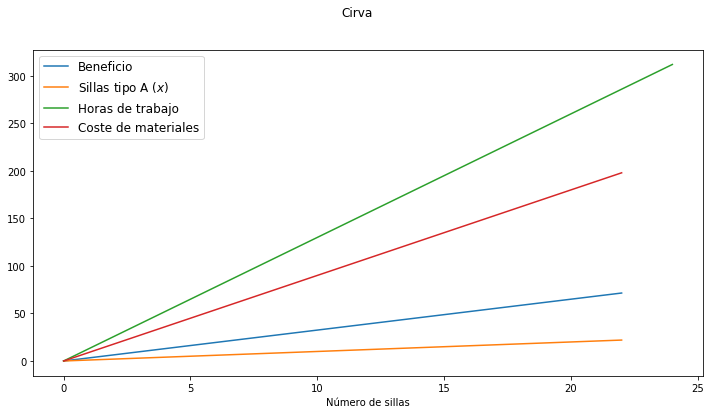

In [50]:
func_beneficio = lambda x, y: (x, y, (7/4)*x + (3/2)*y)
func_horas_trabajo = lambda x, y: 8*x + 5*y
func_coste_materiales = lambda x, y: 4*x + 5*y

# Eje X
x = np.arange(0, 100)

# Eje Y
y = np.arange(0, 100)

# Datos
beneficio, horas_trabajo, coste_materiales = ([], [], [])
for x, y in zip(x, y):
    # Calculamos las restricciones para los datos
    if func_horas_trabajo(x, y) <= 320:
        horas_trabajo.append(func_horas_trabajo(x, y))
    if func_coste_materiales(x, y) <= 200:
        coste_materiales.append(func_coste_materiales(x, y))
    if func_coste_materiales(x, y) <= 200 and func_horas_trabajo(x, y) <= 320:
        beneficio.append(func_beneficio(x, y))


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Cirva")

ax.set_xlabel("Número de sillas")
#ax.axvline(x=max(beneficio), color="k")

print(beneficio)

ax.plot([b[2] for b in beneficio], label="Beneficio")
ax.plot([b[0] for b in beneficio], label="Sillas tipo A ($x$)")
ax.plot(horas_trabajo, label="Horas de trabajo")
ax.plot(coste_materiales, label="Coste de materiales")
plt.legend(loc=2, prop={'size': 12})

plt.show()


______________________

#### Fuentes:
- http://www.srbarreiro.es/Apuntes/CCSS_2bto/Teoria/BS2ProgramacionLIN.pdf